# Task 1 - Prediction using Supervised ML

# GRIP @ The Sparks Foundation

# Authored by Aashay Jain

Predict the percentage of an student based on the no. of study hours.
Data can be found at http://bit.ly/w-data

In [1]:
#import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [2]:
#import dataset
data = pd.read_csv("http://bit.ly/w-data")
#Displaying first 5 rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


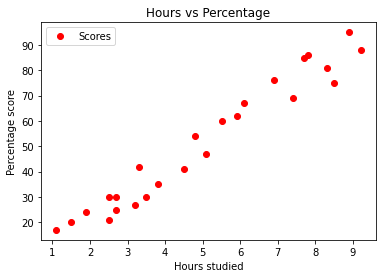

In [11]:
data.plot(x='Hours', y='Scores',color = 'red',style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [13]:
#Dividing data into 'attributes'(inputs) and 'labels'(outputs).
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [14]:
#Spliting dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [15]:
#Training Algorithm
regress = LinearRegression()
regress.fit(x_train,y_train)
print('Training done successfully')

Training done successfully


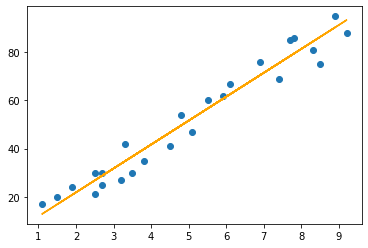

In [20]:
# Plotting the regression line
line = regress.coef_*x+regress.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='orange');
plt.show()

In [21]:
#Making Predictions
print(x_test)

#Model Prediction 
y_pred = regress.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [22]:
# Comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [23]:
#Estimation of training and test scores
print("Training Score:",regress.score(x_train,y_train))
print("Test Score:",regress.score(x_test,y_test))

Training Score: 0.9484509249326872
Test Score: 0.9367661043365055


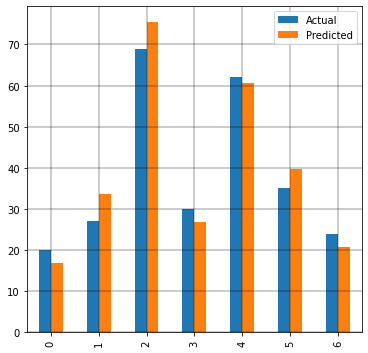

In [29]:
#Now we will plot a Bar graph to show the difference between the actual and predicted values

df.plot(kind='bar',figsize=(6,6))
plt.grid(which='major', linewidth='0.4', color='black')
plt.grid(which='minor', linewidth='0.4', color='blue')
plt.show()

In [30]:
# Testing the model with our own data
hours = 9.25
testing = np.array([hours])
testing = testing.reshape(-1, 1)
prediction = regress.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


In [31]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
R-2: 0.9367661043365055
